# Загрузка библиотек

In [1]:
#pip install pytorch-lifestream

In [2]:
#pip install catboost

In [3]:
#pip install xgboost

In [4]:
#pip install scikit-optimize

In [5]:
#from skopt import BayesSearchCV

In [6]:
#pip install missingno statsmodels

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import gc
import time
import datetime
import pyarrow.parquet as pq
import scipy
#import implicit
#import bisect
#import sklearn.metrics as m
import xgboost as xgb
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

from sklearn.metrics import roc_auc_score, classification_report, recall_score, precision_score, f1_score, accuracy_score
from collections import Counter  
from tqdm import tqdm
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

# Загрузка и предобработка обучающих данных 

In [8]:
# Сброс ограничений на количество выводимых рядов
#pd.set_option('display.max_rows', None)

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# Сброс ограничений на количество символов в записи
#pd.set_option('display.max_colwidth', None)

In [9]:
df_1 = pd.read_csv('train_dataset.csv') #, parse_dates=['report_date']) #, nrows = 9000)

In [10]:
df_1.head(2)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col5

In [11]:
df_saiv = df_1.copy()

# Проблема валидации и разделения трейн-тест

По условиям задачи известно что после целевого действия клиент исключается из выборки. С учётом того что требуется предсказание за три месяца, можно предположить что для нескольких разных по времени срезаов у одного клиента "1" может быть только в срезах отстоящих не более чем на три месяца от последнего по времени значения. Во всех остальных строках у этого клиента гарантировано будет таргет - "0". Используя этот принцип можно искуственно сильно завысить метрику. Но это не поможет решить бизнес задачу а наоборот, затруднит оценку качества модели на реальных данных.
По этому нужно максимально тщательно разделить тренировочную и тестовую выборку для корректной оценки модели. Это можно сделать несколькими методами например том числе разделением по времени (не позволяя модели "смотреть" данные из будущего).

In [12]:
# tscv = TimeSeriesSplit(n_splits=2)
# t_t, t_v = tscv.split(df_1['report_date'])

## ПРЕДОБРАБОТКА И АНАЛИЗ

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2312), int64(3), object(351)
memory usage: 294.0+ MB


In [14]:
#sns.kdeplot(data = df_1,  x = 'col2222', hue= 'target', common_norm= False) 

## Численные значения с малым количеством пропусков

In [15]:
bad_obj_list = []
for i in df_1.columns:
    if df_1[i].dtypes == 'object':
        try:
            df_1[i] = df_1[i].astype(float)
        except:
            bad_obj_list.append(i)   
#Перевёл всё что переводится в числа, что не переводится выписал

In [16]:
dict_dat = {}
iterat = 100
for i in sorted(df_1['report_date'].unique()):
    iterat += 1
    dict_dat[i] = iterat
df_1['num_dat'] = df_1['report_date'].apply(lambda x: dict_dat[x])
#Превратим месяцы в наглядный числовой ряд

In [17]:
lis_bad_hitrate = []
for i in df_1.columns:
    if (df_1[i].isna().sum() / df_1[i].count()) >= 0.7 or len(df_1[i].unique()) <= 2:
        lis_bad_hitrate.append(i)
# Выделил столбцы с пропусками больше 70% или количеством уникальных значений меньше 3

In [18]:
drop_1_list = bad_obj_list + lis_bad_hitrate 
# Выделил список колонок которые нам пока не нужны

In [19]:
# id_test = set(np.random.choice(df_1['client_id'].unique(), 700,  replace= False))
# id_train = set(df_1['client_id'].unique()) - id_test

# features = df_1.drop(columns = bad_obj_list)
# target = df_1[['target', 'client_id']]
# features_train = features[features['client_id'].isin(id_train)].drop(columns = ['target'])
# features_test = features[features['client_id'].isin(id_test)].drop(columns = ['target'])
# target_train = target[target['client_id'].isin(id_train)].drop(columns = ['client_id'])
# target_test = target[target['client_id'].isin(id_test)].drop(columns = ['client_id'])

# Вариант 1, разделил выборку чтобы туда не попадали одинаковые клиенты

In [20]:
df_1['num_dat'].unique()

array([122, 116, 120, 119, 125, 124, 113, 123, 117, 121, 107, 104, 115,
       114, 118, 109, 101, 112, 111, 103, 105, 110, 106, 108, 102],
      dtype=int64)

In [21]:
num_train = sorted(df_1['num_dat'].unique())[0:20]
num_test = sorted(df_1['num_dat'].unique())[-2:]

features = df_1.drop(columns = drop_1_list)
target = df_1[['target', 'num_dat']]
features_train = features[features['num_dat'].isin(num_train)]
features_test = features[features['num_dat'].isin(num_test)]
target_train = target[target['num_dat'].isin(num_train)].drop(columns = ['num_dat'])
target_test = target[target['num_dat'].isin(num_test)].drop(columns = ['num_dat'])

# Вариант 2, разделил выборку по времени

In [22]:
target_train.count(), target_test.count()

(target    9346
 dtype: int64,
 target    2296
 dtype: int64)

In [23]:
xgb_classifier = xgb.XGBClassifier(n_estimators=200, objective='binary:logistic',enable_categorical=True,
                                   tree_method='hist', eta=0.1, max_depth=3, random_state = 123, scale_pos_weight=8)
xgb_classifier.fit(features_train, target_train)
roc_auc_score(target_test, xgb_classifier.predict_proba(features_test)[:,1])
# Обучил базовый бустинг, посмотрел качество

0.7272125968705268

In [24]:
feature_important = xgb_classifier.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

name_fit = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
name_fit
# Вывел фичи по важности методом weight

,score
client_id,101.0
col2663,90.0
col2311,48.0
col2316,42.0
col2317,40.0
...,...
col1490,1.0
col2175,1.0
col2366,1.0
col2358,1.0


In [25]:
xgb_classifier = xgb.XGBClassifier(n_estimators=250, objective='binary:logistic',enable_categorical=True,
                                   tree_method='hist', eta=0.1, max_depth=3, random_state = 123, scale_pos_weight=8)
xgb_classifier.fit(features_train[set(name_fit.head(90).index)], target_train)
'roc_auc -', roc_auc_score(target_test, xgb_classifier.predict_proba(features_test[set(name_fit.head(90).index)])[:,1])
# Обучил модель на 90 первых по важности фичах, посмотрел качество

('roc_auc -', 0.723441433436991)

In [26]:
df_1['col2663'].max(), df_1['col2663'].mean(), df_1['col2663'].median(),  df_1['col2663'].min()

(0.3397996299534702,
 0.25833012613466194,
 0.2562613816564786,
 0.2302292442857854)

<AxesSubplot:xlabel='col2663', ylabel='Density'>

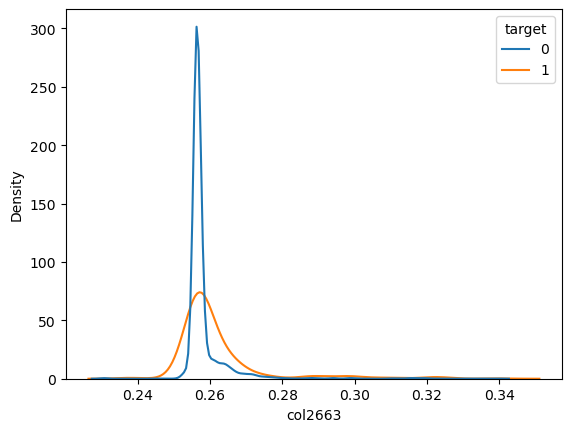

In [27]:
sns.kdeplot(data = df_1,  x = 'col2663', hue= 'target', common_norm= False) 

In [28]:
df_1['col2220'].max(), df_1['col2220'].mean(), df_1['col2220'].median(),  df_1['col2220'].min()

(46836494.5, 7884007.684282587, 6831104.72, 1000.0)

<AxesSubplot:xlabel='col2220', ylabel='Density'>

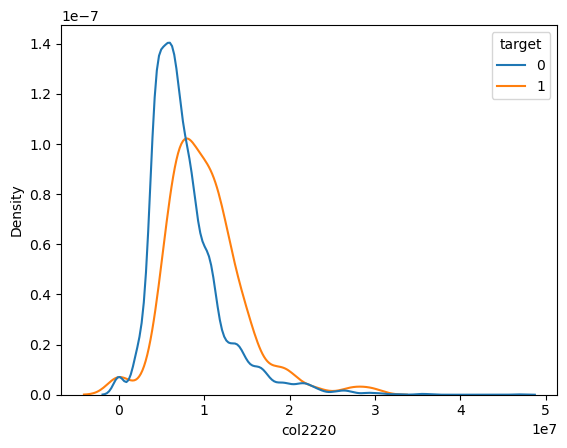

In [29]:
sns.kdeplot(data = df_1,  x = 'col2220', hue= 'target', common_norm= False) 

In [30]:
# pd.DataFrame(np.array(rez_l)[:, :-1],
#              index = np.array(rez_l)[:, 5],
#              columns =   ['weight', 'gain', 'cover', 'total_gain', 'total_cover'])

In [31]:
gud_num_fit = name_fit.head(90).index
# Сохранил список нужных фичей

## Численные значения с большим количеством пропусков

In [32]:
pca_list =  set(lis_bad_hitrate) - set(bad_obj_list) - set(['col1069', 'col1173'])
# Выделил список колонок с разреженными численными значениями

In [33]:
len(pca_list)

2150

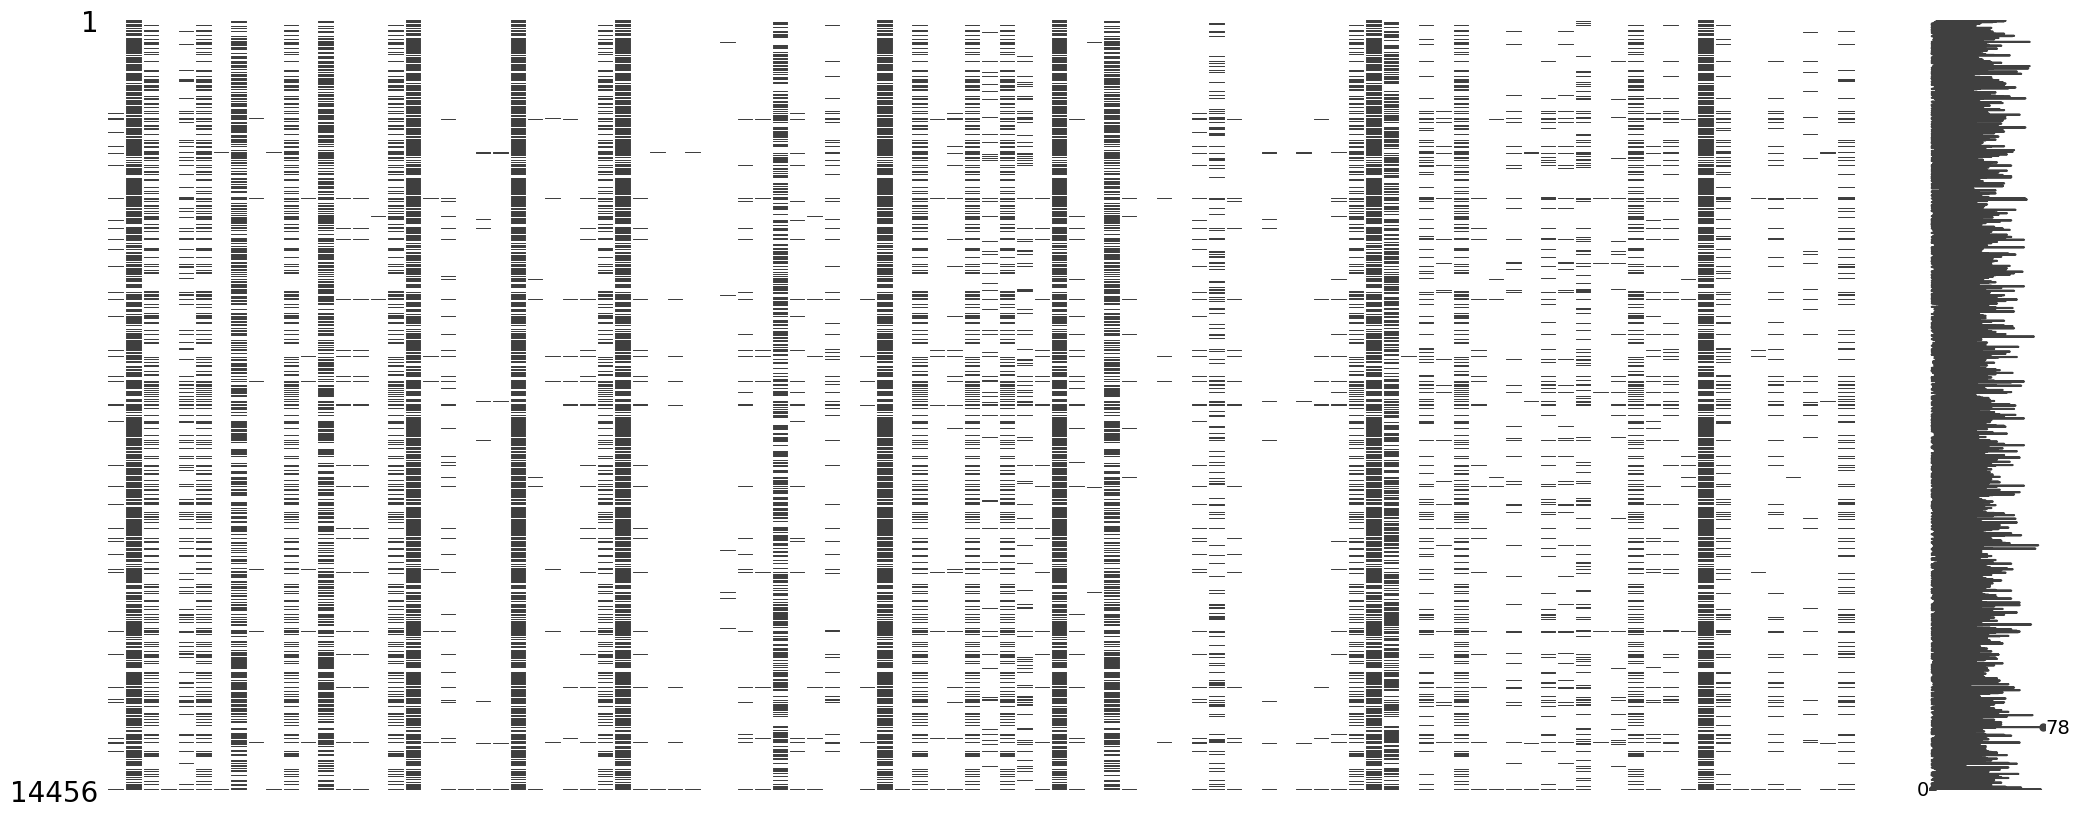

In [34]:
msno.matrix(df_1[pca_list].iloc[:,:100])
plt.show()

In [35]:
num_train = sorted(df_1['num_dat'].unique())[0:20]
num_test = sorted(df_1['num_dat'].unique())[-2:]

features = df_1 #.drop(columns = drop_1_list)
target = df_1[['target', 'num_dat']]
features_train = features[features['num_dat'].isin(num_train)][pca_list].drop(columns = ['target'])
features_test = features[features['num_dat'].isin(num_test)][pca_list].drop(columns = ['target'])
target_train = target[target['num_dat'].isin(num_train)].drop(columns = ['num_dat'])
target_test = target[target['num_dat'].isin(num_test)].drop(columns = ['num_dat'])

# Вариант 2, разделил выборку по времени

In [36]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9346 entries, 2 to 14455
Columns: 2149 entries, col256 to col1532
dtypes: float64(2148), int64(1)
memory usage: 153.3 MB


In [37]:
xgb_classifier = xgb.XGBClassifier(n_estimators=200, objective='binary:logistic',enable_categorical=True,
                                   tree_method='hist', eta=0.1, max_depth=3, random_state = 123, scale_pos_weight=8)
xgb_classifier.fit(features_train, target_train)
roc_auc_score(target_test, xgb_classifier.predict_proba(features_test)[:,1])
# Обучил базовый бустинг, посмотрел качество

0.5682314033269165

In [38]:
for i in features_train.columns:
    features_train.loc[features_train[i].isna(), i] = -1
    features_test.loc[features_test[i].isna(), i] = -1
sc = StandardScaler() 
X_train = sc.fit_transform(features_train) 
X_test = sc.transform(features_test) 
# заполнил пропуски, провёл стандартизацию

In [39]:
pca = PCA() 
pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_ 
# Использовал метод главных компонент

(0.0, 400.0)

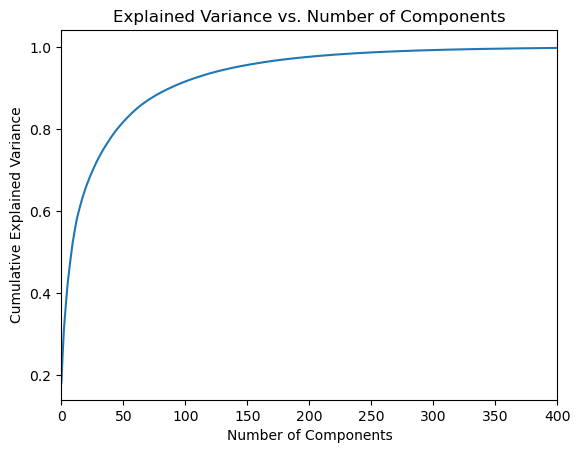

In [40]:
cumulative_variance = np.cumsum(explained_variance)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.xlim([0, 400])

In [41]:
pca = PCA(n_components=300, svd_solver = 'arpack')
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), index = target_train.index) 
X_test_pca = pd.DataFrame(pca.fit_transform(X_test), index = target_test.index)
#svd_solver = 'arpack' потому что на больших матрицаx работает рандомно
# 300 по тому что по графику видно что более 200-250 прирост останавливается

In [42]:
xgb_classifier = xgb.XGBClassifier(n_estimators=200, objective='binary:logistic',enable_categorical=True,
                                   tree_method='hist', eta=0.1, max_depth=3, random_state = 123, scale_pos_weight=8)
xgb_classifier.fit(X_train_pca, target_train)
roc_auc_score(target_test, xgb_classifier.predict_proba(X_test_pca)[:,1])
# Обучил базовый бустинг, посмотрел качество

0.6182634878325683

In [43]:
feature_important = xgb_classifier.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

name_fit = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
name_fit
# Вывел фичи по важности методом weight

,score
89,28.0
2,18.0
4,17.0
272,17.0
1,16.0
...,...
246,1.0
91,1.0
146,1.0
93,1.0


In [44]:
good_pca_fit = list(map(int, name_fit.head(90).index))

In [45]:
xgb_classifier = xgb.XGBClassifier(n_estimators=250, objective='binary:logistic',enable_categorical=True,
                                   tree_method='hist', eta=0.1, max_depth=3, random_state = 123, scale_pos_weight=8)
xgb_classifier.fit(X_train_pca[good_pca_fit], target_train)
'roc_auc -', roc_auc_score(target_test, xgb_classifier.predict_proba(X_test_pca[good_pca_fit])[:,1])
# Обучил модель на 90 первых по важности фичах, посмотрел качество

('roc_auc -', 0.5977294042154104)

## Категориальные значения

Проанализировал категориальные данные по смыслу (исходя из значений) Согласно интуиции и опыта, наиболее перспективными показались следующие:

**Столбцы и их предположительное значение:** 
- 536 - типы мобильных устройств
- 552 - страницы, на которые чаще всего заходят на сайте самолета
- 592 - страны
- 244 - ссылки, ведущие на страницу машиномест
- 600 - регионы
- 519 - действия на странице
- 191 варианты отделки и/или дизайна интерьера
- 188 типы комнат
- 176 агенства-недвижимости 
- 168 этапы сделки

In [46]:
df_1['col191'].unique()

array([nan, 'Скандинавский', 'Лофт', 'Современный', 231386.0, 289193.0,
       'Классический', 48948.0, 'Мебель 176932', '153916', '48948',
       'Мебель 198690'], dtype=object)

In [47]:
df_1.loc[~df_1['col168'].isna(), ['col161', 'col167', 'col168']].head(6)

,col161,col167,col168
8,NaN,NaN,Договор оферты
11,NaN,Подтверждение номера,Подтверждение номера
23,NaN,Успешная оплата,Успешная оплата
43,NaN,NaN,Данные покупателя
123,NaN,NaN,Данные покупателя
148,NaN,NaN,Подтверждение номера


In [48]:
df_1.loc[~df_1['col188'].isna(), ['col181', 'col182', 'col183']].head(6)

,col181,col182,col183
177,NaN,NaN,NaN
258,NaN,NaN,Кабинет
301,NaN,NaN,NaN
411,NaN,NaN,NaN
720,NaN,NaN,NaN
969,NaN,Ванная комната,Ванная комната


In [49]:
df_1['col181'].isna().sum(), df_1['col182'].isna().sum(), df_1['col187'].isna().sum(), df_1['col188'].isna().sum()

(14447, 14442, 14399, 14345)

In [50]:
perspectiv_cat_fit = ['col188', 'col188', 'col191', 'col536', 'col552', 'col592', 'col244', 'col600', 'col519']

При этом многие группы значений дублируются, но с разным количеством пропусков. Это может значит агрегацию по разным периодам времени. К сожалению рассмотреть вопрос подробнее не хватило времени.

In [51]:
# for i in features_train.columns:
#     features_train.loc[features_train[i].isna(), i] = -1
#     features_test.loc[features_test[i].isna(), i] = -1

# Финальное обучение модели на выбранных данных и тонкая настройка

### Финальная предобработка данных

In [52]:
df_saiv.head(3)

report_date  client_id  target  col1  col2  col3  col4  col5  col6  col7  \
0  2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   col8  col9  col10  col11  col12  col13  col14  col15  col16  col17  col18  \
0   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   col19  col20  col21  col22  col23  col24  col25  col26  col27  col28  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   col29  col30  col31  col32  col33  col34  col35  col36  col37  col38  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   col39  col40  col41  col42  col43  col44  col45  col46  col47  col48 col49  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   

  col50 col51 col52 col53 col54 col55 col56 col57 col58 col59 col60 col61  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

  col62 col63 col64  col65  col66  col67  col68  col69  col70  col71  col72  \
0   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   col73  col74  col75  col76  col77  col78  col79  col80  col81  col82  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   col83  col84 col85 col86 col87 col88 col89 col90 col91 col92 col93 col94  \
0    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

  col95 col96 col97 col98 col99 col100  col101  col102  col103  col104  \
0   NaN   NaN   NaN   NaN   NaN    NaN     NaN     NaN     NaN     NaN   
1   NaN   NaN   NaN   NaN   NaN    NaN     NaN     NaN     NaN     NaN   
2   NaN   NaN   NaN   NaN   NaN    NaN     NaN     NaN     NaN     NaN   

   col105  col106  col107  col108  col109  col110  col111  col112  col113  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   col114  col115  col116  col117  col118  col119  col120  col121  col122  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   col123  col124  col125  col126  col127  col128 col129 col130 col131 col132  \
0     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   
2     NaN     NaN     NaN     NaN     N

In [53]:
bad_obj_list = []
for i in df_saiv.columns:
    if df_saiv[i].dtypes == 'object':
        try:
            df_saiv[i] = df_saiv[i].astype(float)
        except:
            bad_obj_list.append(i)   
#Перевёл всё что переводится в числа, что не переводится выписал

In [54]:
dict_dat = {}
iterat = 100
for i in sorted(df_saiv['report_date'].unique()):
    iterat += 1
    dict_dat[i] = iterat
df_saiv['num_dat'] = df_saiv['report_date'].apply(lambda x: dict_dat[x])
#Превратим месяцы в наглядный числовой ряд

In [55]:
num_train = sorted(df_saiv['num_dat'].unique())[0:20]
num_test = sorted(df_saiv['num_dat'].unique())[-2:]

features = df_saiv
target = df_saiv[['target', 'num_dat']]
features_train = features[features['num_dat'].isin(num_train)]
features_test = features[features['num_dat'].isin(num_test)]
target_train = target[target['num_dat'].isin(num_train)].drop(columns = ['num_dat'])
target_test = target[target['num_dat'].isin(num_test)].drop(columns = ['num_dat'])

In [56]:
for i in list(pca_list) + perspectiv_cat_fit:
    features_test.loc[features_test[i].isna(), i] = -1
    features_train.loc[features_train[i].isna(), i] = -1

for i in perspectiv_cat_fit:
    features_train[i] = features_train[i].astype('category')
    features_test[i] = features_test[i].astype('category')
    
sc = StandardScaler() 
X_train = sc.fit_transform(features_train[pca_list]) 
X_test = sc.transform(features_test[pca_list]) 

pca = PCA(n_components=300, svd_solver = 'arpack')
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), index = target_train.index) 
X_test_pca = pd.DataFrame(pca.fit_transform(X_test), index = target_test.index)

In [57]:
fit_1 = set(gud_num_fit) | set(perspectiv_cat_fit)

In [58]:
features_train_fin = features_train[fit_1].join(X_train_pca[good_pca_fit])
features_test_fin = features_test[fit_1].join(X_test_pca[good_pca_fit])

In [59]:
xgb_classifier = xgb.XGBClassifier(n_estimators=250, objective='binary:logistic', enable_categorical=True,
                                   tree_method='hist', eta=0.1, max_depth=3, random_state = 123, scale_pos_weight=8)
xgb_classifier.fit(features_train_fin, target_train)
'roc_auc -', roc_auc_score(target_test, xgb_classifier.predict_proba(features_test_fin)[:,1])
# Обучил модель на 90 первых по важности фичах, посмотрел качество

('roc_auc -', 0.7195616762920184)

In [60]:
feature_important = xgb_classifier.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

name_fit = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
name_fit

,score
165,95.0
171,85.0
166,73.0
176,57.0
89,42.0
...,...
207,1.0
col536,1.0
col2360,1.0
190,1.0


In [61]:
df_valid = pd.read_csv('test.csv', sep=';') #, parse_dates=['report_date']) #, nrows = 9000)

In [62]:
dict_dat = {}
list_dat = list(df_valid['report_date'].unique()) + list(df_saiv['report_date'].unique())
iterat = 100
for i in sorted(list_dat):
    iterat += 1
    dict_dat[i] = iterat
df_valid['num_dat'] = df_valid['report_date'].apply(lambda x: dict_dat[x])

In [63]:
bad_obj_list = []
for i in df_valid.columns:
    if df_valid[i].dtypes == 'object':
        try:
            df_valid[i] = df_valid[i].astype(float)
        except:
            bad_obj_list.append(i)   

In [64]:
set(bad_obj_list) & set(pca_list)

set()

In [65]:
pca_list = pca_list - set(['target'])

In [66]:
for i in list(pca_list) + perspectiv_cat_fit:
    df_valid.loc[df_valid[i].isna(), i] = -1

for i in perspectiv_cat_fit:
    df_valid[i] = df_valid[i].astype('category')

In [67]:
X_val = sc.fit_transform(df_valid[pca_list]) 

In [68]:
X_val_pca = pd.DataFrame(pca.fit_transform(X_val), index = df_valid.index)

In [69]:
features_valid_fin = df_valid[fit_1].join(X_val_pca[good_pca_fit])

In [70]:
xgb_classifier.predict_proba(features_valid_fin)[:,1]

array([3.4469670e-06, 5.1857549e-04, 2.5811591e-04, ..., 8.6839158e-05,
       4.6988106e-01, 2.2501668e-03], dtype=float32)

# Отправка решения

In [71]:
df_ss = pd.read_csv('submission.csv', sep=';') #, parse_dates=['report_date']) #, nrows = 9000)

In [72]:
df_ss

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
3637,3637,0
3638,3638,0
3639,3639,0
3640,3640,0


In [73]:
df_ss['target'] = xgb_classifier.predict_proba(features_valid_fin)[:,1]

In [74]:
#df_valid[['report_date', 'client_id']].join(df_ss['score'])

In [ ]:
df_ss.to_csv('sample_submission_3.csv', index = False, sep = ';')